# Linear_Regression_ML_Python

This is a Linear Regression task to predict what score a student gets if study for 9.25 hours in a day. The data set consists of two numerical variables the first is number of hours a student study in a day and the latter is the Score he/she get. 
The data set (which is a CSV file) is loaded from url https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv

In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# Below here are several helpful packages to be loaded to find solution to the given problem 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
#To load the data in a csv file from url into a DataFrame
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [28]:
data.head()                    #To see how data is loaded into DataFrame

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
data.shape                     #To know the shape of DataFrame(i.e, Number of rows(data points) and columns )

(25, 2)

In [30]:
data.info()                    #To get information regarding the data type of variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


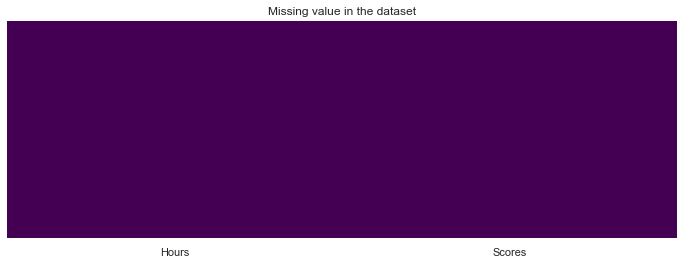

In [31]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

This shows that there are no null values in given data

In [32]:
data.describe()                 #to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


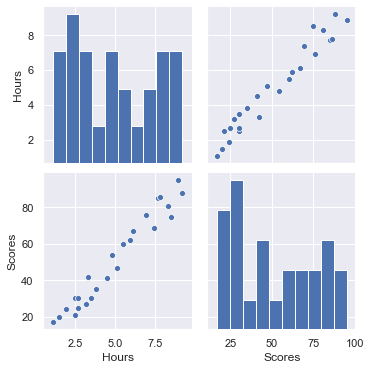

In [33]:
sns.pairplot(data)               #To visualize data in pair plots

Pair plots allows us to see both distribution of single variables and relationships between two variables. From above pair plot we can observe that the relation ship between Hours and Scores  in Linear.

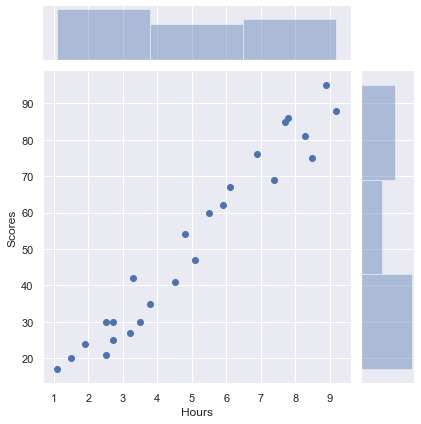

In [34]:
sns.jointplot(x='Hours',y ='Scores', data = data)

The abovs is a joint plot, from that we can observe there are more number of students who study lessthan 5 hours and morethan 7 hours per day. But in between 5 and 7 hours few students study.

Text(0, 0.5, 'Scores Obtained')

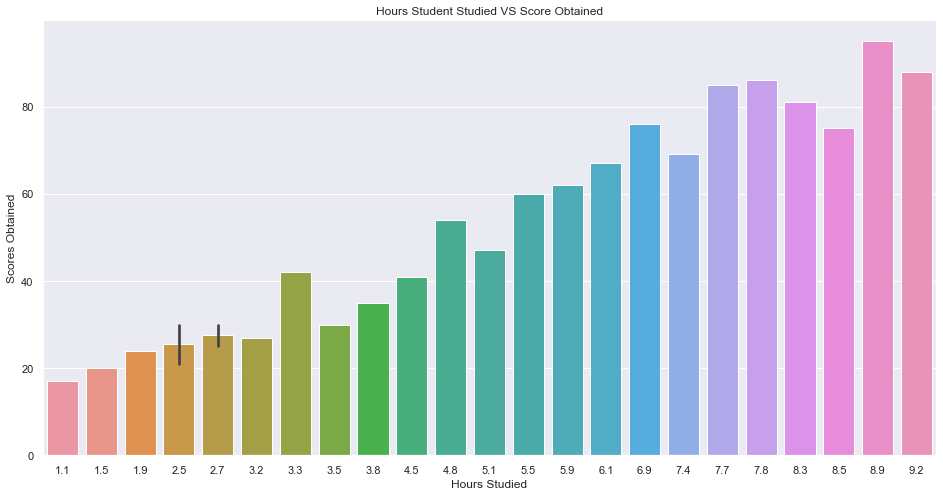

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(x="Hours",y="Scores",data=data)
plt.title("Hours Student Studied VS Score Obtained")
plt.xlabel("Hours Studied")
plt.ylabel("Scores Obtained")

Text(0.5, 1, 'No of Hours Studied Vs Score Obtained')

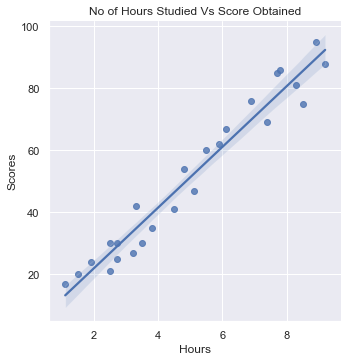

In [36]:
sns.set(color_codes=True)
sns.lmplot(x='Hours', y='Scores',data=data)
plt.title("No of Hours Studied Vs Score Obtained")


The above is lmplot which is used in Linear Regression problems. It clearly shows it is a regression and we can observe the data points with trend line. Data is arranged in linear form.

From here we start splitting the data for training and testing then fit into linear regression model to find the solution for our problrm.

In [37]:
X = data[['Hours']]                                     #To store independent variable

In [38]:
y= data['Scores']                                       #To store dependent/target variable

In [39]:
from sklearn.model_selection import train_test_split    # To use built-ins in sklearn and import test, train and split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100) #To split, train and test data also to send 20 percent of the data to testing and remaining data training set, set random state t0 100

In [41]:
from sklearn.linear_model import LinearRegression      # Importing Linear Regression from scikit learn

In [42]:
lm = LinearRegression()                                # creating an instance for linear regressiosn

In [43]:
lm.fit(X_train, y_train )                              # Fit training data to linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)

Intercept: 
 1.9894231109746912
Coefficients: 
 [9.83544438]


In [45]:
predictions = lm.predict(X_test)                     # get all the predictions and store them into a variable

In [46]:
# Comparing Actual vs Predicted results
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})  
df

,Actual,Predicted
9,25,28.545123
22,35,39.364112
13,42,34.446390
11,62,60.018545
5,20,16.742590


Text(0.5, 0, 'Y test')

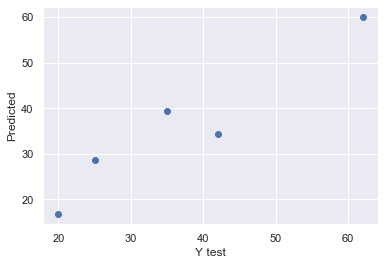

In [47]:
plt.scatter(y_test, predictions)                     #To represent the actual and predicted results in a graph form
plt.ylabel('Predicted')
plt.xlabel('Y test')

In [48]:
import sklearn.metrics as metrics
print('Mean Absolute Error (MAE): {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('Mean Squared Error  (MSE): {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('Root Mean Squared Error (RMSE): {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

Mean Absolute Error (MAE): 4.140342096254413
Mean Squared Error  (MSE): 20.641456931253995
Root Mean Squared Error (RMSE): 4.543287018366107


In [50]:

# prediction with sklearn
Hours = 9.25

predict_outcome = lm.predict([[Hours]])
    
print(predict_outcome)


[92.96728365]


In [52]:
#R-SQUARED AND ADJUSTED R-SQUARED COEFFICIENTS
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model1=sm.OLS(y_train,X_train)
result=model1.fit()
print(result.summary())                                 #To get summary of our model

                                 OLS Regression Results                                
Dep. Variable:                 Scores   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              2189.
Date:                Fri, 25 Sep 2020   Prob (F-statistic):                    4.35e-21
Time:                        18:54:01   Log-Likelihood:                         -62.950
No. Observations:                  20   AIC:                                      127.9
Df Residuals:                      19   BIC:                                      128.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------